In [141]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [142]:
import matplotlib.pyplot as plt
course=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTxAouJr0dDYak-SkrtmkWg6EK2gAxaTqplvYye8HiOnbxtqyHoWM_Jz9bzyHCPi6kZq6E8WFaU8jZO/pub?output=csv', index_col=0)
course

,Unnamed: 1,Score,In what department Does your course lie?,What led you to make the decision?,"If you were given a chance to change, what department would you select?",What would you like to become in the foreseeable future?,What's your name
Timestamp,,,,,,,
3/11/2024 11:41:10,NaN,1,Directorate of Computing and Elearning,Passion,Directorate of Computing and Elearning,Software engineer,NaN
3/11/2024 11:45:49,NaN,6,School of Cooperatives and community development,KUCCPS Selection,School of Cooperatives and community development,Flight Attendant,NaN
3/11/2024 11:47:28,NaN,11,Directorate of Computing and Elearning,Passion,School of Cooperatives and community development,Very rich,NaN
3/11/2024 11:52:01,NaN,16,Directorate of Computing and Elearning,Passion,Directorate of Computing and Elearning,Software engineer,NaN
3/11/2024 11:52:56,NaN,21,School of Cooperatives and community development,Passion,School of Cooperatives and community development,Psychologist,NaN
...,...,...,...,...,...,...,...
3/14/2024 14:37:26,NaN,626,Directorate of Computing and Elearning,Passion,Directorate of Computing and Elearning,Software developer and data analyst,Valerie Mwelu muhia
3/14/2024 18:40:10,NaN,631,School of Cooperatives and community development,Passion,School of Cooperatives and community development,The best teacher in the world,LOISE
3/14/2024 20:47:55,NaN,636,School of Business and Economics,Passion,School of Business and Economics,Business person,Lucy Nyambura


DATA PREPROCESSING

In [143]:
course.describe()

,Unnamed: 1,Score
count,0.0,130.000000
mean,NaN,323.500000
std,NaN,188.359143
min,NaN,1.000000
25%,NaN,162.250000
50%,NaN,323.500000
75%,NaN,484.750000
max,NaN,646.000000


count    130.000000
mean     323.500000
std      188.359143
min        1.000000
25%      162.250000
50%      323.500000
75%      484.750000
max      646.000000
Name: Score, dtype: float64


<Axes: xlabel='Score', ylabel='Count'>

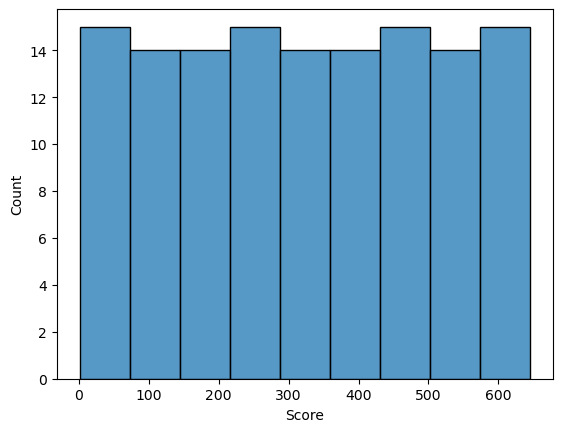

In [144]:
import seaborn as sns
print(course.Score.describe())
sns.histplot(course.Score)

In [145]:
comluns=['Unnamed: 1']
course.drop(comluns, axis=1 , inplace=True)

In [146]:
course['Score'].fillna(course["Score"].mean())


Timestamp
3/11/2024 11:41:10      1
3/11/2024 11:45:49      6
3/11/2024 11:47:28     11
3/11/2024 11:52:01     16
3/11/2024 11:52:56     21
                     ... 
3/14/2024 14:37:26    626
3/14/2024 18:40:10    631
3/14/2024 20:47:55    636
3/14/2024 22:13:13    641
3/15/2024 10:28:47    646
Name: Score, Length: 130, dtype: int64

In [147]:
course.isna()

,Score,In what department Does your course lie?,What led you to make the decision?,"If you were given a chance to change, what department would you select?",What would you like to become in the foreseeable future?,What's your name
Timestamp,,,,,,
3/11/2024 11:41:10,False,False,False,False,False,True
3/11/2024 11:45:49,False,False,False,False,False,True
3/11/2024 11:47:28,False,False,False,False,False,True
3/11/2024 11:52:01,False,False,False,False,False,True
3/11/2024 11:52:56,False,False,False,False,False,True
...,...,...,...,...,...,...
3/14/2024 14:37:26,False,False,False,False,False,False
3/14/2024 18:40:10,False,False,False,False,False,False
3/14/2024 20:47:55,False,False,False,False,False,False


In [148]:
course.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 3/11/2024 11:41:10 to 3/15/2024 10:28:47
Data columns (total 6 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   Score                                                                    130 non-null    int64 
 1   In what department Does your course lie?                                 130 non-null    object
 2   What led you to make the decision?                                       130 non-null    object
 3   If you were given a chance to change, what department would you select?  130 non-null    object
 4   What would you like to become in the foreseeable future?                 121 non-null    object
 5   What's your name                                                         117 non-null    object
dtypes: int64(1), object(5)
memory usage: 11.2+ KB


In [149]:
course.head()

,Score,In what department Does your course lie?,What led you to make the decision?,"If you were given a chance to change, what department would you select?",What would you like to become in the foreseeable future?,What's your name
Timestamp,,,,,,
3/11/2024 11:41:10,1,Directorate of Computing and Elearning,Passion,Directorate of Computing and Elearning,Software engineer,NaN
3/11/2024 11:45:49,6,School of Cooperatives and community development,KUCCPS Selection,School of Cooperatives and community development,Flight Attendant,NaN
3/11/2024 11:47:28,11,Directorate of Computing and Elearning,Passion,School of Cooperatives and community development,Very rich,NaN
3/11/2024 11:52:01,16,Directorate of Computing and Elearning,Passion,Directorate of Computing and Elearning,Software engineer,NaN
3/11/2024 11:52:56,21,School of Cooperatives and community development,Passion,School of Cooperatives and community development,Psychologist,NaN


In [150]:
nan_present = course.isnull().values.any()
nan_present

True

In [151]:
dataset_train=course.fillna(method="ffill")

In [152]:
nan_present = dataset_train.isnull().values.any()
nan_present

True

In [153]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 3/11/2024 11:41:10 to 3/15/2024 10:28:47
Data columns (total 6 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   Score                                                                    130 non-null    int64 
 1   In what department Does your course lie?                                 130 non-null    object
 2   What led you to make the decision?                                       130 non-null    object
 3   If you were given a chance to change, what department would you select?  130 non-null    object
 4   What would you like to become in the foreseeable future?                 130 non-null    object
 5   What's your name                                                         117 non-null    object
dtypes: int64(1), object(5)
memory usage: 11.2+ KB


In [154]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for i in dataset_train.columns:
    if dataset_train[i].dtype == 'object':
        dataset_train[i]=label_encoder.fit_transform(dataset_train[i])
dataset_train.head()

,Score,In what department Does your course lie?,What led you to make the decision?,"If you were given a chance to change, what department would you select?",What would you like to become in the foreseeable future?,What's your name
Timestamp,,,,,,
3/11/2024 11:41:10,1,0,2,0,92,117
3/11/2024 11:45:49,6,2,1,2,62,117
3/11/2024 11:47:28,11,0,2,2,99,117
3/11/2024 11:52:01,16,0,2,0,92,117
3/11/2024 11:52:56,21,2,2,2,84,117


CORRELATION 

In [155]:
corr_matrix = dataset_train.corr().abs()
corr_matrix.style.background_gradient(cmap='magma')

,Score,In what department Does your course lie?,What led you to make the decision?,"If you were given a chance to change, what department would you select?",What would you like to become in the foreseeable future?,What's your name
Score,1.000000,0.141021,0.033742,0.108883,0.274158,0.171450
In what department Does your course lie?,0.141021,1.000000,0.160525,0.448671,0.228019,0.053544
What led you to make the decision?,0.033742,0.160525,1.000000,0.116035,0.159943,0.161234
"If you were given a chance to change, what department would you select?",0.108883,0.448671,0.116035,1.000000,0.081773,0.042872
What would you like to become in the foreseeable future?,0.274158,0.228019,0.159943,0.081773,1.000000,0.050163
What's your name,0.171450,0.053544,0.161234,0.042872,0.050163,1.000000


EXPLORING THE RELATIONSHIPS BETWEEN THE VARIABLES

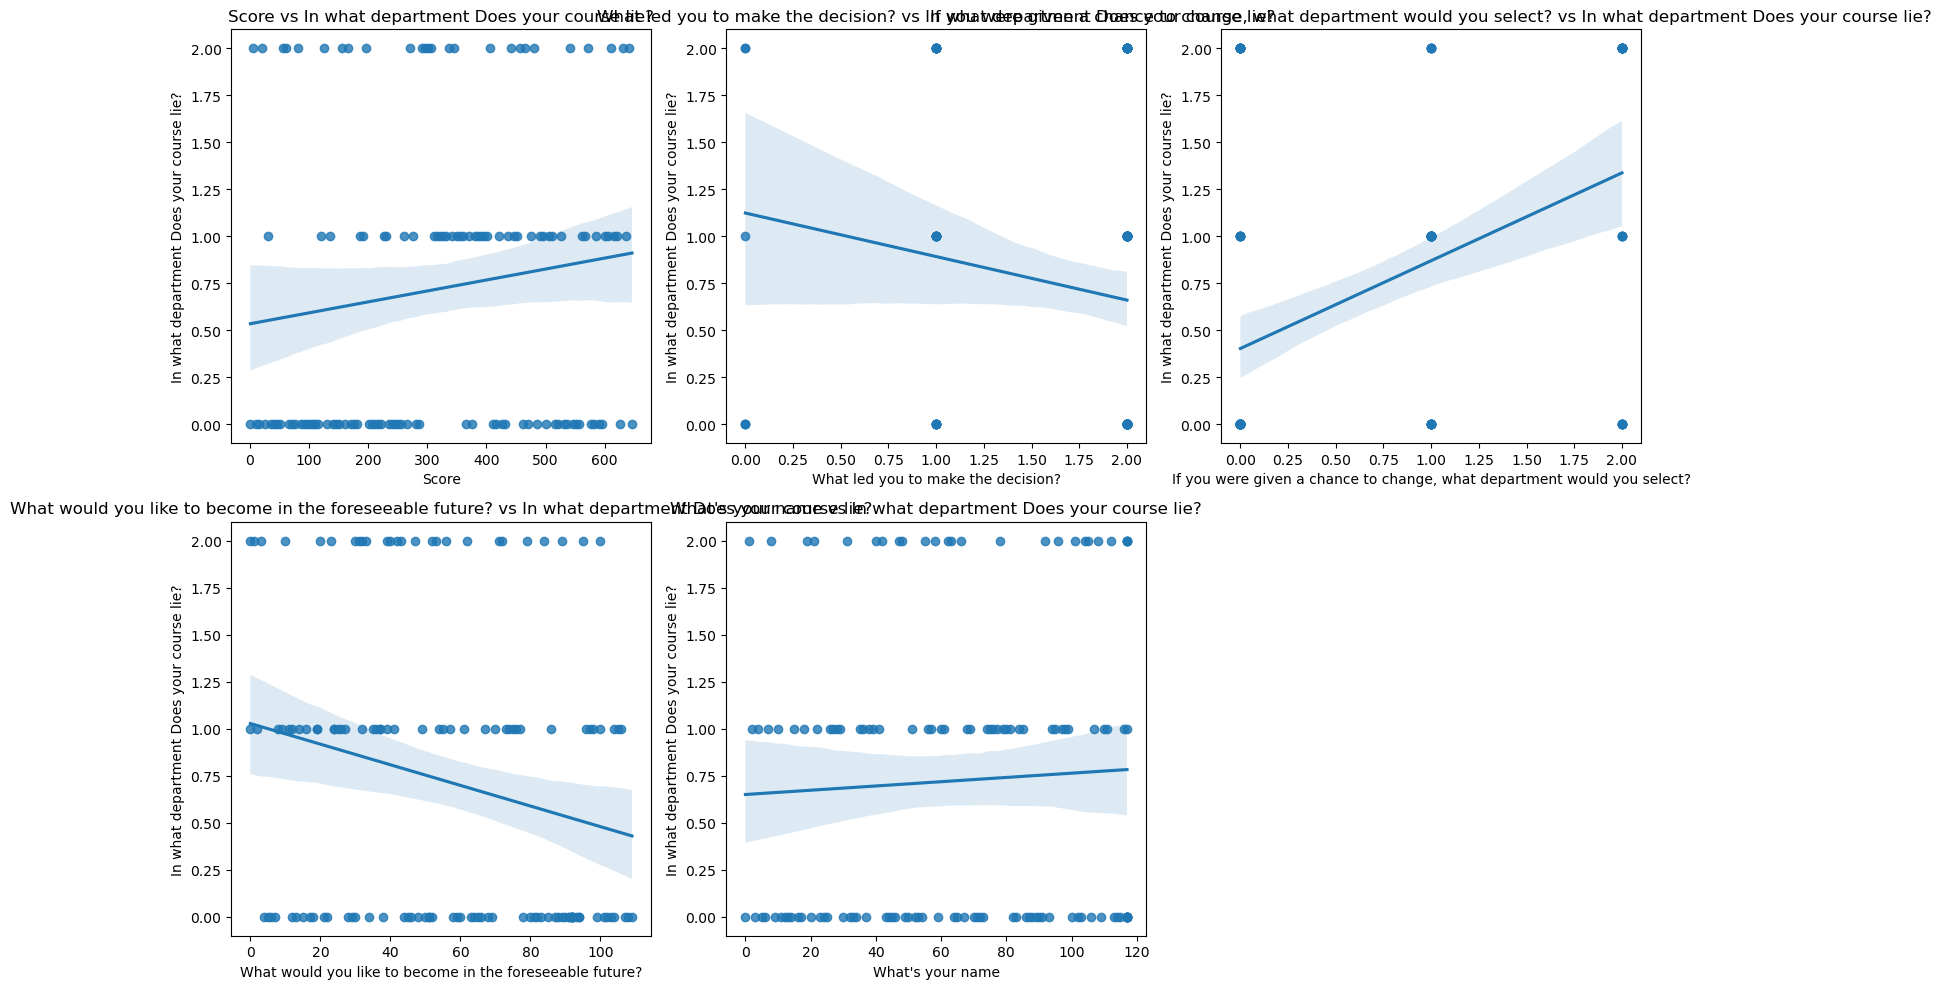

In [156]:
columns_to_plot = [col for col in dataset_train.columns if col != 'In what department Does your course lie?']
num_cols = 3
num_rows = int(np.ceil(len(columns_to_plot) / num_cols))
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))
for i, col in enumerate(columns_to_plot):
    row_index = i // num_cols
    col_index = i % num_cols
    sns.regplot(data=dataset_train, x=col, y='In what department Does your course lie?', ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'{col} vs In what department Does your course lie?')
    
num_features = len(columns_to_plot)
for i in range(num_features, num_rows*num_cols):
    axes.flatten()[i].axis('off')
plt.tight_layout()
plt.show()